# *MDI 721- TP2 ...*

On utilisera IPython Notebook pour réaliser ce TP. On déposera son compte-rendu sur le
site pédagogique avant le 22 novembre, 23h59. </br>
Nous travaillons sur la base de données diabetes de python. La base initiale comporte
n = 442 patients et p = 10 covariables. La variable Y à expliquer est un score correspondant à
l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en
y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti
notre jeu de données, il a volontairement mélangé les variables entre elle de façon aléatoire. Bien
entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous
ne connaissons pas les variables pertinentes. La nouvelle base de données comporte n = 442
patients et p = 210 covariables, notés X. Saurez-vous déjouer les plans de ce robot farceur et
retrouver les variables pertinentes ? </br>

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [45]:
df:pd.DataFrame = pd.read_csv("data_dm3.csv",header= None, ddof)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In [127]:
df.shape

(442, 211)

Q.1

On a ici un tableau de valeurs constitués de 
<li>441 individus</li>
<li> 211 - 1 : variables explicatives </li>

Q.2

In [29]:
#contrôler que toutes les variables sont centrées et normalisé écart type =1
df.describe().loc()

In [44]:
df[range(210)].describe().loc["mean"].sum()
df[range(210)].describe().loc["std"].sum()/210

1.0011331448394591

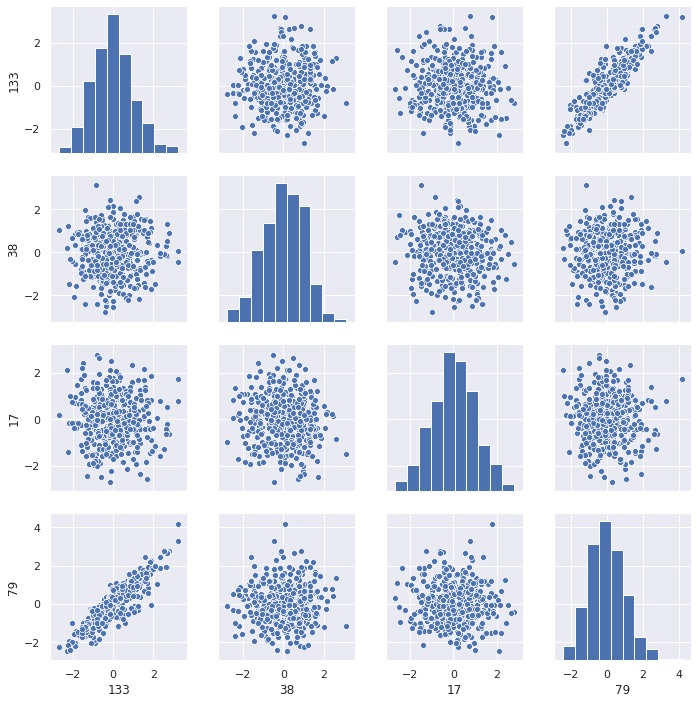

In [66]:
#ajouter titres
sns.pairplot(data=df[(np.random.randint(0,210,4))])

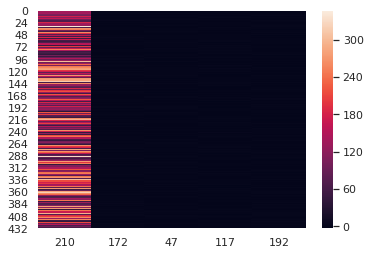

In [70]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

uniform_data = df[np.append(210,(np.random.randint(0,209,4)))]
ax = sns.heatmap(uniform_data)


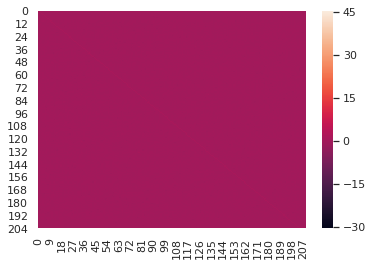

In [63]:
michel = df[(np.random.randint(0,210,6))].cov()
michel2 = df.cov()
ax2 = sns.heatmap(michel2[range(209)])

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

Q.3

In [203]:
X_train, X_test, y_train, y_test = train_test_split(df[range(0,210)], df[210], test_size=0.20, random_state=42)

In [204]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,-0.004562,-0.032999,-0.027802,0.028890,0.025219,0.006451,0.002391,0.089597,0.002262,0.005765,...,-0.039028,-0.003440,0.002159,0.022968,-0.011574,0.009327,0.014022,-0.023538,-0.005307,0.008665
std,1.021243,1.006208,1.005245,1.013262,1.005630,1.010948,1.010865,0.957467,1.004391,0.993684,...,1.024981,0.982809,0.997888,0.998043,0.997087,1.015686,0.981268,1.004611,0.991987,0.997997
min,-3.149247,-2.862871,-3.057543,-2.856903,-3.102347,-2.782344,-2.825318,-2.893172,-2.834007,-2.695861,...,-3.436711,-3.059475,-3.206539,-2.585325,-3.561763,-3.167962,-2.751207,-3.028940,-2.675447,-2.695177
25%,-0.648512,-0.781127,-0.730442,-0.675753,-0.599304,-0.685355,-0.687377,-0.498246,-0.664930,-0.678118,...,-0.744976,-0.625511,-0.607597,-0.602905,-0.630615,-0.684752,-0.631954,-0.704748,-0.699505,-0.604053
50%,0.019797,0.021490,0.017001,0.056933,0.026614,-0.000057,-0.075120,0.091010,0.021686,0.097997,...,0.016105,-0.033638,0.009057,-0.015422,-0.043423,0.041582,0.009293,0.013243,0.001945,-0.072314
75%,0.658759,0.613660,0.657691,0.704532,0.740294,0.687069,0.725312,0.648673,0.588866,0.666232,...,0.632681,0.663834,0.667869,0.599132,0.734863,0.719176,0.653108,0.615773,0.703229,0.756291
max,2.547051,2.567177,2.965824,3.057612,3.173713,3.137950,3.199205,3.616718,3.099090,3.032505,...,2.737036,2.677458,2.806877,3.255462,2.811911,2.838960,3.351254,2.734481,2.627227,2.710260


In [223]:
X_train.shape

(353, 210)

In [205]:
Q.4

SyntaxError: invalid syntax (<ipython-input-205-913ecfad8b70>, line 1)

In [206]:
X_train.cov()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1.042938,-0.166811,-0.017657,-0.292867,0.168622,0.148878,-0.037101,-0.144117,0.002317,-0.016612,...,-0.161399,-0.007207,0.018261,0.042208,-0.047444,0.030448,-0.076355,-0.032298,0.152318,-0.071563
1,-0.166811,1.012455,0.072563,-0.227520,-0.106010,-0.089948,0.222511,-0.098402,0.035617,-0.105327,...,-0.132572,-0.008139,-0.022768,-0.246465,-0.039333,0.086558,-0.004265,-0.125649,-0.099927,0.059506
2,-0.017657,0.072563,1.010517,-0.200654,0.155778,-0.093920,-0.057117,0.037955,-0.048972,-0.138045,...,0.169071,0.001262,0.128149,0.007814,0.051682,0.088741,-0.041345,-0.337855,0.045464,-0.150994
3,-0.292867,-0.227520,-0.200654,1.026701,0.031396,-0.020940,0.126168,-0.121212,0.073137,0.015683,...,0.117038,-0.018233,-0.138913,0.146851,-0.024933,-0.228767,0.082392,0.039786,-0.173003,-0.360762
4,0.168622,-0.106010,0.155778,0.031396,1.011293,-0.061662,0.023941,0.167568,-0.026198,0.169265,...,0.181440,-0.017950,0.101128,-0.110669,-0.112171,-0.132660,0.078585,-0.064028,0.070299,-0.075674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.030448,0.086558,0.088741,-0.228767,-0.132660,0.007437,-0.013257,0.011690,0.099069,0.034544,...,-0.061193,0.187852,0.064691,-0.141113,-0.004264,1.031618,0.018379,-0.091320,0.023089,-0.131717
206,-0.076355,-0.004265,-0.041345,0.082392,0.078585,0.024355,-0.030217,-0.061108,-0.097408,0.103126,...,-0.003994,0.016843,-0.019464,-0.091676,0.126013,0.018379,0.962887,0.092124,0.039777,0.059113
207,-0.032298,-0.125649,-0.337855,0.039786,-0.064028,0.203611,0.118274,-0.224477,-0.168529,0.122945,...,0.200234,-0.095510,-0.113050,0.179912,-0.067315,-0.091320,0.092124,1.009243,-0.131189,0.303804
208,0.152318,-0.099927,0.045464,-0.173003,0.070299,0.048297,0.013247,-0.030637,0.023252,0.085717,...,-0.031462,-0.098490,0.092463,-0.007156,0.044050,0.023089,0.039777,-0.131189,0.984038,0.022781


In [207]:
scaled_features = scale(X_train, axis=0, with_mean=True, with_std=False)

In [208]:
from sklearn.decomposition import PCA

In [209]:
ipca = PCA(n_components=209)
model =  ipca.fit(X_train)
new = model.explained_variance_ratio_ 
eighenvalue = model.singular_values_

Text(0.5, 1.0, 'explained variance')

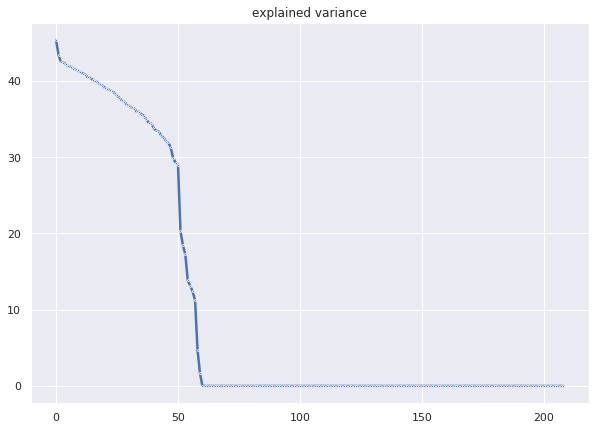

In [210]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=eighenvalue, marker='o',markersize=2, linewidth=2.5)
plt.title("explained variance")

Text(0.5, 1.0, 'explained variance')

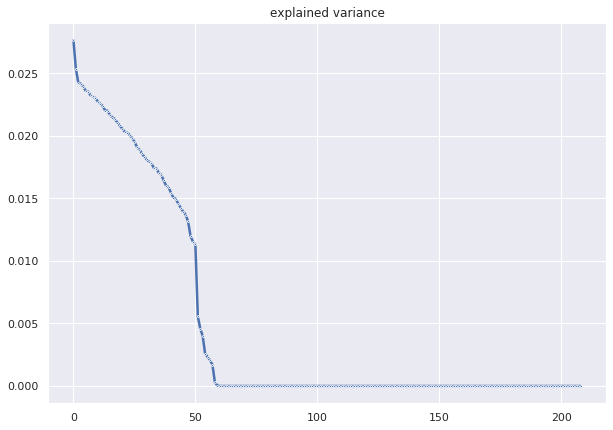

In [211]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=new, marker='o',markersize=2, linewidth=2.5)
plt.title("explained variance")

In [212]:
Xtild2 = PCA(n_components=60).fit_transform(X_train)
Xtild2.shape

(353, 60)

In [213]:
Xtild2_test = PCA(n_components=60).fit(X_train).transform(X_test)
Xtild2_test.shape

(89, 60)

In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
print(y_train.shape, Xtild2.shape)

(353,) (353, 60)


In [216]:
reg = LinearRegression(fit_intercept=True, normalize=True).fit(Xtild2, y_train)
#reg.score(Xtild2, y_train)
prediction_ALS = reg.predict(Xtild2_test)
print("intercept ALS : " + str(reg.intercept_) )
jojo = np.sort(reg.coef_)

intercept ALS : 153.73654390934846


In [217]:
residus_ALS = y_test - prediction_ALS

R² ALS : 0.42767779780822834


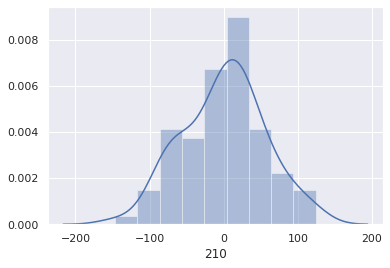

In [218]:
sns.distplot(residus_ALS)
print("R² ALS : " + str(reg.score(Xtild2_test, y_test)))

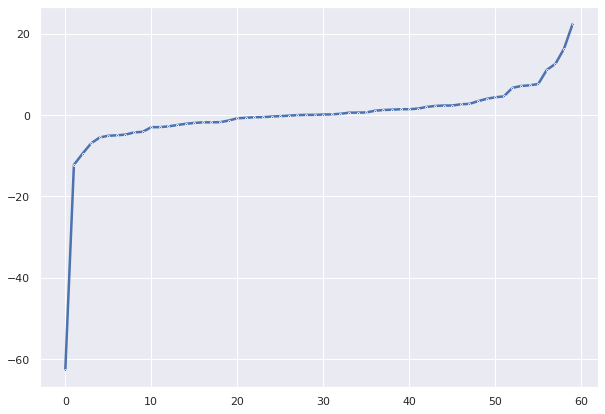

In [219]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=jojo, marker='o',markersize=2, linewidth=2.5)

In [220]:
#Sans ALS
reg2 = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
#reg.score(Xtild2, y_train)
print("intercept sans ALS : " + str(reg2.intercept_) )
prediction_sans_ALS = reg2.predict(X_test)
jojo2 = np.sort(reg2.coef_)

intercept sans ALS : 152.98654390934846


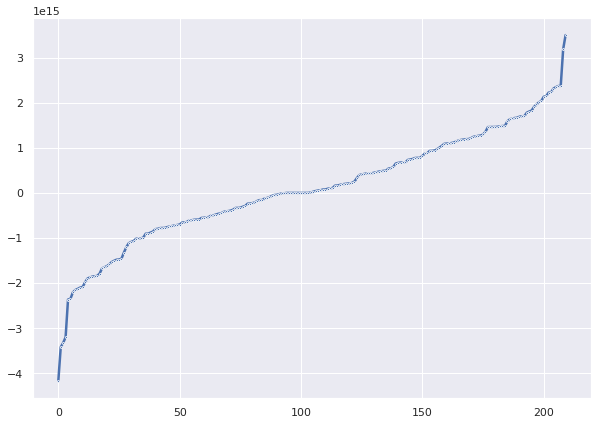

In [221]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=jojo2, marker='o',markersize=2, linewidth=2.5)

R² OLS : 0.26872961414503105


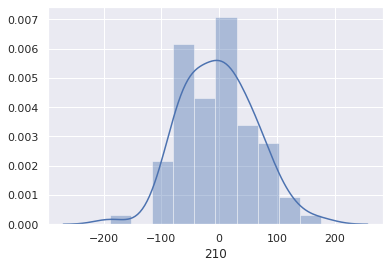

In [222]:
residus_sans_ALS = y_test - prediction_sans_ALS
print("R² OLS : " + str(reg2.score(X_test, y_test)))
sns.distplot(residus_sans_ALS)
